# BAIT 509: Business Applications of Machine Learning
## Lecture 1 - Introduction to Machine Learning, the decision tree algorithm

Tomas Beuzen, 6th January 2020

# Lecture outline
- [1. Goals of this course (5 mins)](#1)
- [2. Lecture learning objectives](#2)
- [3. About me (5 mins)](#3)
- [4. Python and Jupyter (5 mins)](#4)
- [5. Machine learning (15 mins)](#5)
- [6. Tabular data and terminology (5 mins)](#6)
- [--- Break --- (10 mins)](#break)
- [7. Decision Trees (30 mins)](#7)
- [8. Class Exercise: decision trees on a real dataset (15 mins)](#8)
- [9. What we've learned today (5 mins)](#9)
- [10. Summary questions to ponder](#10)

# 1. Goals of the course (5 mins) <a id="1"></a>

- Describe fundamental machine learning concepts;
- Broadly explain how common machine learning algorithms work;
- Implement a machine learning pipeline in Python; and,
- Apply machine learning methods to carry out supervised learning projects and to
answer business objectives.

# 2. Lecture learning objectives <a id="2"></a>

- Describe the difference between supervised and unsupervised learning
- Distinguish machine learning terminology such as features, targets, training, etc.
- Broadly describe how the decision tree algorithm works
- Develop a decision tree model using scikit-learn and the fit/predict paradigm
- Describe the difference between parameters and hyperparameters in machine learning models

# 3. About me (5 mins) <a id="3"></a>
- From Australia

<img src='./img/home.png' width="600"> 

- BEng (Civil Engineering)
- BSci (Climate Dynamics)
- PhD (Coastal Engineering: Topic - machine learning for predicting coastal storm erosion)
- Primarily a Python user, also competent in R
- Experience in consulting, research, education

|                                               |                                               |
|:---------------------------------------------:|:---------------------------------------------:|
| <img src='./img/beach_1.jpg' width="300"> | <img src='./img/beach_2.jpg' width="300"> |
| <img src='./img/beach_3.jpg' width="300"> | <img src='./img/beach_4.jpg' width="300"> |

# 4. Python and Jupyter (5 mins) <a id="4"></a>
- In this course we will primarily be using Python
- Jupyter notebooks are a great tool for coding/documenting/visualizing all at once
- I will be using Jupyter notebooks to deliver lectures and you will be using them to complete your assignments
- I recommend using the [Anaconda distribution](https://www.anaconda.com/distribution/) to install and manage your Python package installations
- To install a few key packages we will be using in the course, type at the command line:
    - `conda install pandas numpy scikit-learn matplotlib jupyter altair seaborn python-graphviz`
- `conda list` will show you a list of currently installed packages

# 5. Machine learning (15 mins) <a id="5"></a>

- As the [ISLR](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) book puts it, ML is a “*vast set of tools for understanding data*”
- There are two main types of ML:
    1. **Supervised learning**
        - Classification
        - Regression
    2. **Unsupervised learning**

## 5.1 Supervised learning (the focus of BAIT 509)
- In supervised learning, we have a set of observations (__*X*__) with a known response (__*y*__)
- We wish to find a model function that relates __*X*__ to __*y*__
- Then use that model function to predict future observations
- We use an algorithm to find the model function for us
- **The focus is on prediction**

<img src='./img/sup_learning.png' width="700">

- See the magic in action...

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import sys
sys.path.append('code/')
from toy_classifier import classify_image

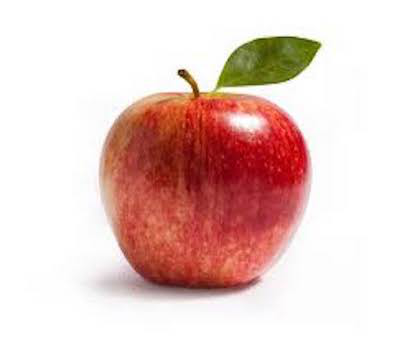

In [2]:
img = Image.open("img/apple.jpg")
img

In [3]:
classify_image(img, 5)

Class, Probability
------------------
Granny Smith, 0.80
pomegranate, 0.08
fig, 0.07
strawberry, 0.04
buckeye, horse chestnut, conker, 0.00


## 5.2 Classification vs Regression
- Variables can be characterized as quantitative/numeric or qualitative/categorical
- **Classification** = prediction of a qualitative response (like the apple/banana example above)
- **Regression** = prediction of a quantitative response (below is an example of regression, predicting apple weight)

<img src='./img/regr.png' width="750">

## 5.3 Unsupervised learning  (not in BAIT 509)
- We have observations (__*X*__), but no associated response (__*y*__)
- We wish to group/cluster/find structure in the data

<img src='./img/unsup_learning.png' width="630">

## 5.4 Class Exercise

### Supervised vs Unsupervised

Are the following supervised or unsupervised problems?

1. Finding groups of similar properties in a real estate data set.
2. Predicting real estate prices based on house features like number of rooms, learning from past sales as examples.
3. Idenitfying groups of animals given features such as "number of legs", "wings/no wings", "fur/no fur", etc.
4. Detecting credit card fraud based on examples of fraudulent transactions.


### Classification vs Regression

Are the following classification or regression problems?

1. Predicting the price of a house based on features like number of rooms.
2. Predicting if a house will sell or not based on features like the price of the house, number of rooms, etc.
3. Predicting your grade in BAIT 509 based on past grades.
4. Predicting what product a consumer is most likely to purchase based on their internet browsing patterns.

# 6. Tabular data and terminology <a id="6"></a>
### Tabular data
- For ML we typically work with "tabular data"
- Rows represent `observations`
- Columns represent `features` (the last column is typically the `target`)

- I will use the Pandas function `read_csv()` to import a toy dataset
- (We will use thie data a little later on)

In [4]:
df = pd.read_csv('data/cities_USA.csv', index_col=0).sample(6, random_state=100)
df

,lon,lat,vote
249,-124.027305,40.822381,blue
319,-110.941976,42.712829,red
174,-84.569611,39.032378,red
286,-95.340293,41.827063,blue
185,-77.316731,39.210042,blue
236,-100.310773,40.578560,red


- This dataset contains longtitude and latitude data for 400 cities in the US
- Each city is labelled as `red` or `blue` depending on how they voted in the 2012 election.
- The data was sampled from (http://simplemaps.com/static/demos/resources/us-cities/cities.csv). The election information was collected from Wikipedia.

### Terminology
- You will see a lot of variable terminology in ML
- See the MDS terminology resource [here](https://ubc-mds.github.io/resources_pages/terminology/)

Of particular note:

- **observations** = examples = rows = samples = records = instances (usually denoted by $n$)
- **features** = inputs = predictors = explanatory variables = regressors = independent variables = covariates (usually denoted by $d$)
- **targets** = outputs = outcomes = response variable = dependent variable = labels (if categorical).
- **training** = learning = fitting

In [5]:
df

,lon,lat,vote
249,-124.027305,40.822381,blue
319,-110.941976,42.712829,red
174,-84.569611,39.032378,red
286,-95.340293,41.827063,blue
185,-77.316731,39.210042,blue
236,-100.310773,40.578560,red


In [6]:
df.shape

(6, 3)

- In this data set we have 6 observations of 2 features and 1 target.

# -------- Break (5 mins) -------- <a id="break"></a>

# 7. Decision Trees (30 mins) <a id="7"></a>

## 7.1 A conceptual introduction to Decision Trees

- Shown below is some hypothetical data with 2 features (x and y axes) and 1 target (with 2 classes)
- The supervised learning problem here is to predict whether a particular observaton belongs to the <font color='blue'>**BLUE**</font> or <font color='orange'>**ORANGE**</font> class
- A fairly intuitive way to do this is to simply use thresholds to split the data up

<img src='./img/scatter_dt1.png' width="450">

- For example, we can **split** the data at `Feature_1 = 0.47`
- Everything **less than** the split we can classify as <font color='orange'>**ORANGE**</font>
- Everything **greater than** the split we can classify as <font color='blue'>**BLUE**</font>
- By this method, we can successfully classify 7 / 9 observations

<img src='./img/scatter_dt2.png' width="450">

- But we don't have to stop there, we can make another split!
- Let's now split the section that is greater than `Feature_1 = 0.47`, using `Feature_2 = 0.52`
- We now have the following conditions:
    - If `Feature_1 > 0.47` and `Feature_2 < 0.52` classify as <font color='blue'>**BLUE**</font>
    - If `Feature_1 > 0.47` and `Feature_2 > 0.52` classify as <font color='orange'>**ORANGE**</font>
- Using these rules, we now successfully classify 8 / 9 observations

<img src='./img/scatter_dt3.png' width="450">

- Okay, last one
- Let's make a final split of the section that is less than `Feature_1 = 0.47`, using `Feature_2 = 0.6`
- By this methodology we have successfully classified all of our data

<img src='./img/scatter_dt4.png' width="450">

- What we've really done here is create a group of `if` statements:
    - If `Feature_1 < 0.47` and `Feature_2 < 0.6` classify as <font color='orange'>**ORANGE**</font>
    - If `Feature_1 < 0.47` and `Feature_2 > 0.6` classify as <font color='blue'>**BLUE**</font>
    - If `Feature_1 > 0.47` and `Feature_2 < 0.52` classify as <font color='blue'>**BLUE**</font>
    - If `Feature_1 > 0.47` and `Feature_2 > 0.52` classify as <font color='orange'>**ORANGE**</font>
- This is easier to visualize as a tree:

<img src='./img/toy_tree.png' width="450">

- We just made our first decision tree!

## 7.2 Scikit-learn

"Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities." Source: [scikit-learn website](https://scikit-learn.org/stable/getting_started.html)

- Scikit-learn (hereafter, referred to as sklearn) is the main ML library for Python
- We will be using it for the rest of this course
- sklearn comes with the Anaconda distribution, but it can be installed at ther terminal using:
> `conda install scikit-learn`

- We will explore various modules and algorithms within sklearn throughout this course
- For now we're focussing on the Decision Tree algorithm

## 7.3 Using scikit-learn's fit/predict to build a decision tree

- We generally import a particular ML algorithm using the following syntax
- `from sklearn.module import algorithm`
- The decision tree classification algorithm (`DecisionTreeClassifier`) sits within the `tree` module
- (Note there is also a Decision Tree Regression algorithm in this module which we'll come to later...)
- Let's import the classifier using the following code:

In [7]:
from sklearn.tree import DecisionTreeClassifier

- We can begin creating a model by instantiating an instance of the algorithm class
- For now, don't worry too much about what's in the parentheses in the code below

In [8]:
model = DecisionTreeClassifier(max_depth=2, random_state=1)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

- At this point we just have the framework of a model
- What we see above are all the settings for the decision tree algorithm that we can tweak to influence how the model is learned (more on that in a bit)
- We can't do anything with our algorithm yet, because it hasn't seen any data!
- We need to give our algorithm some data to learn/train/fit a model
- Let's use the election data we imported previously to make a decision tree model

In [9]:
df

,lon,lat,vote
249,-124.027305,40.822381,blue
319,-110.941976,42.712829,red
174,-84.569611,39.032378,red
286,-95.340293,41.827063,blue
185,-77.316731,39.210042,blue
236,-100.310773,40.578560,red


- We first need to split our data into the features and the target
- This is so the algorithm knows what data is the input features, and what is the target (the thing we want to predict)

In [10]:
X = df.drop(columns=['vote'])
y = df[['vote']]

In [11]:
X

,lon,lat
249,-124.027305,40.822381
319,-110.941976,42.712829
174,-84.569611,39.032378
286,-95.340293,41.827063
185,-77.316731,39.210042
236,-100.310773,40.578560


In [12]:
y

,vote
249,blue
319,red
174,red
286,blue
185,blue
236,red


- We can now use the `.fit()` method to train our model using the `X` and `y` data

In [13]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

- Now we've used data to learn a model
- Let's take a look at the model we made!
- The code below prints out our model structure for us (like the tree we made ourselves earlier)

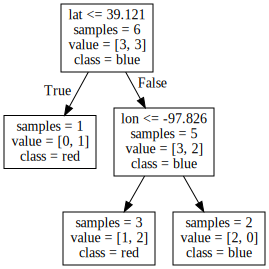

In [14]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model)
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=["blue", "red"],
                                impurity=False))

- We can better visualize what's going on by actually plotting our data and the model "decision boundaries"
- The code below does just this
- It's using some code I have made myself located in the code folder on Canvas
- I'm also using the plotting library `altair` to make this plot (which you may not have seen). It makes very nice plots but requires some wrangling to get data into a suitable format for use with the package. **You do not need to learn to use Altair in this course**, all your plotting for this course may be done in `matplotlib`

In [15]:
import altair as alt # altair is a plotting library
import sys
sys.path.append('code/')
from model_plotting import plot_model, plot_regression_model, plot_tree_grid # these are some custom plotting scripts I made

In [16]:
plot_model(X, y, model)

alt.LayerChart(...)

- In this plot the shaded regions show what our model predicts for different feature values
- The scatter points are our actual 6 observations
- From the above plot, we can see that our model is misclassifying one blue observation
- But there's an easier way to find out how our model is doing
- We can predict the data using the `.predict()` method of our model
- Let's see what the model predicts for our training data `X`

In [17]:
model.predict(X)

array(['red', 'red', 'red', 'blue', 'blue', 'red'], dtype=object)

- Let's compare to the actual labels (seeing as we know them)
- Note that `.to_numpy()` simply changes a dataframe to a numpy array, and `np.squeeze()` squeezes the result to a 1d array. The only reason I'm using these commands is so we can easily compare the output to the output of `.predict()` above.

In [18]:
np.squeeze(y.to_numpy())

array(['blue', 'red', 'red', 'blue', 'blue', 'red'], dtype=object)

- We can see that our model correctly predicts 5 our of 6 points (the first one is misclassified)
- So we have an accuracy = 5/6 = 0.83 = 83%
- We can actually obtain this result directly using the `.score()` method

In [19]:
model.score(X, y)

0.8333333333333334

- By the way, we can also predict a brand new (made up) point
- Note that the `np.atleast_2d()` function ensures an array is 2D
- We have to use this here because sklearn is expecting a 2D input

In [20]:
model.predict(np.atleast_2d([-90, 40]))

array(['blue'], dtype=object)

## 7.4 Decision tree splitting rules
- One thing you might be wondering is how does a tree choose which feature and what value to split on?
- There are seemingly infinite values that could be used to make a split!
- Consider the plot from our model before:

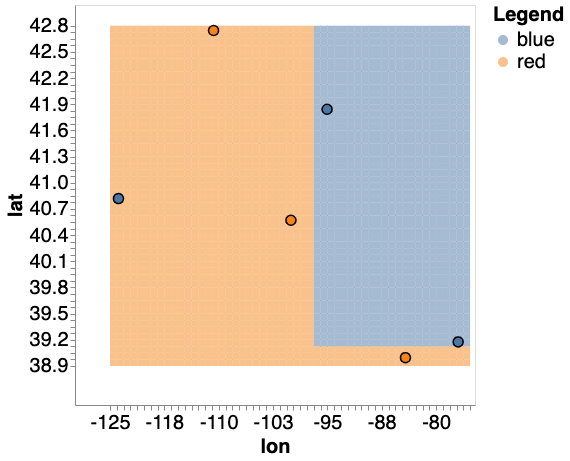

In [21]:
plot_model(X, y, model)

- How do we choose where to split?
- We will not go into detail here, but there are two important things to note:


1. We evaluate the utility of a split using very simple mathemtical formula (see [here](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)). The idea is to simply make the split that gives you the most homogenous groups (i.e., groups that contain all orange or all blue)
2. There is only a finite set of splits to check. For example, in the plot above we have an orange point at lon=100 and a blue point at lon=95. There is no point checking a split at every single number between these two points (they will all give the same answer!) - instead, we simply test one split, the midpoint, lon=97.5.

## 7.5 ML model parameters and hyperparameters
- When you call `fit`, the ML algorithm is learning a bunch of values
- In the case of a decision tree, it is learning what feature and value to split on
- These values are called **parameters**

<img src='./img/tree_params.png' width="400">

- But even before calling `fit` on a specific data set, we can set some "knobs" that control the learning
- These are called **hyperparameters**
- In sklearn, hyperparameters are set in the constructor
- We saw one earlier called `max_depth`
- This hyperparameter controls how "deep" we allow our tree to grow
- Below we create a "decision stump", a tree of depth 1 (i.e., only 1 split is made)

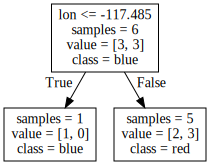

In [22]:
model = DecisionTreeClassifier(max_depth=1).fit(X, y) # max_depth of 1 is called a "Decision Stump"
dot_data = export_graphviz(model)
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=["blue", "red"],
                                impurity=False))

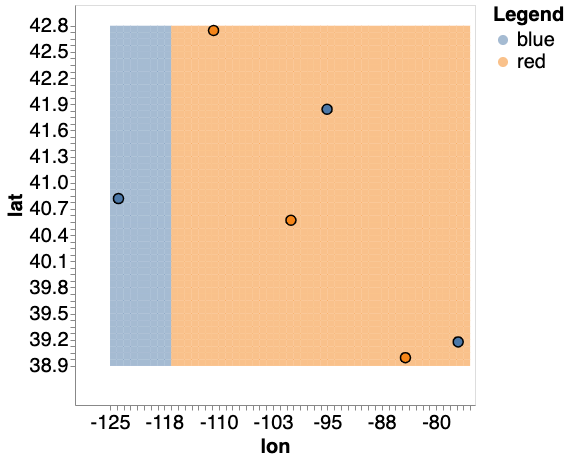

In [23]:
plot_model(X, y, model)

- Let's take a look at the score of this model
- We get an accuracy of 66%

In [24]:
model.score(X, y)

0.6666666666666666

- We can control the model using different `max_depth` values
- Let's try growing a more complex tree model
- Let's use `max_depth = 5`

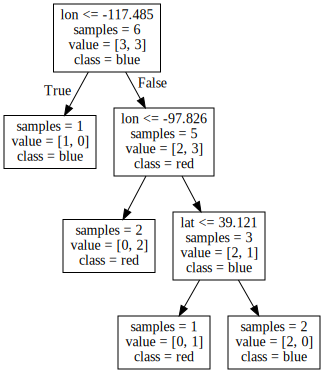

In [25]:
model = DecisionTreeClassifier(max_depth=5).fit(X, y)
dot_data = export_graphviz(model)
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=["blue", "red"],
                                impurity=False))

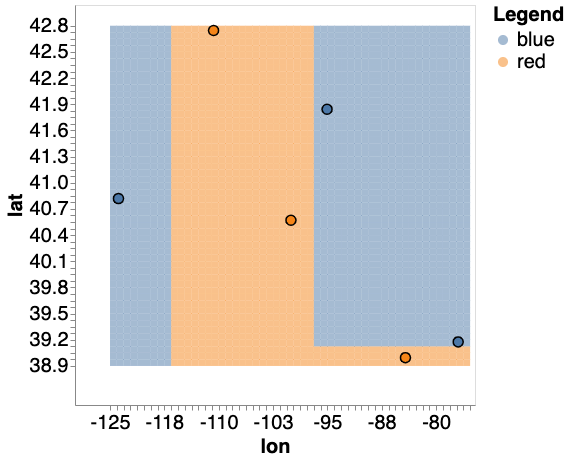

In [26]:
plot_model(X, y, model)

- Let's take a look at the score of this model
- We now get an accuracy of 100%

In [27]:
model.score(X, y)

1.0

- At this point you might be wondering, how do we choose the best value for our hyperparameters?
- More on that tomorrow...

To summarize this section:
- **parameters** are automatically learned by an algorithm during training
- **hyperparameters** are specified before training

## 7.6 Decision Tree regression

- In this lecture we have mostly focussed on classification so far
- But most algorithms can be used for both classification AND regression
- Note: regression plots more naturally in 1D, classification in 2D, but of course we can do either for any $d$
- We can use the cell below to import the regression version of the decision tree algorithm

In [28]:
from sklearn.tree import DecisionTreeRegressor

- The code below creates some synthetic data to help us visualise decision tree regression

In [29]:
X = np.atleast_2d(np.linspace(-7, 6.5, 60)).T
y = (np.sin(X.T**2/5) + np.random.randn(60)*0.1).T

- I've created some code to help us visualise decision tree regression in action
- Let's first try a tree with `max_depth=1`
- For this model, we have made a single split
- We then predict the average of the groups on either side of the split

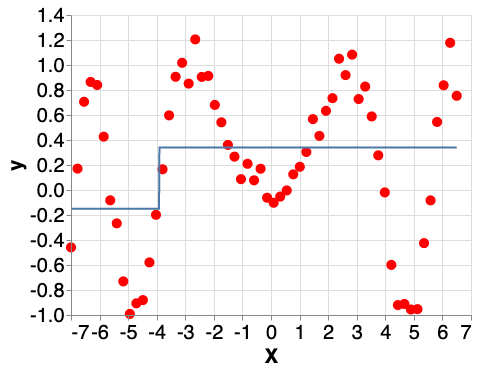

In [30]:
max_depth = 1  # hyperparameter for tree model
model = DecisionTreeRegressor(max_depth=max_depth).fit(X, y)
plot_regression_model(X, y, model)

- What happens as we increase `max_depth`?

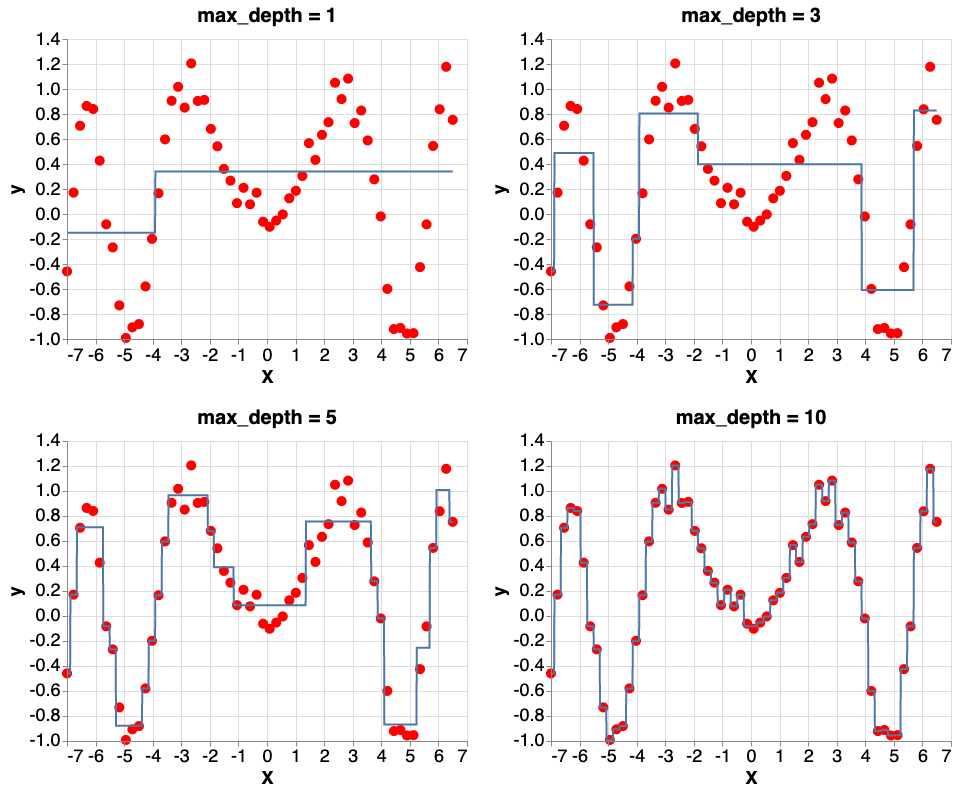

In [31]:
plot_tree_grid(X, y, max_depth=[1, 3, 5, 10])

- We see that lower `max_depth` smooths over the scatter in our data
- higher `max_depth` fits more closely to the scatter in our data

# 8. Class Exercise: decision trees on a real dataset (15 mins) <a id="8"></a>

- Let's load in the full cities dataset for this exercise

In [32]:
df = pd.read_csv('data/cities_USA.csv', index_col=0)

Your tasks:

1. How many features are in this dataset?
2. How many observations are in this dataset?
3. Using sklearn, create 3 different decision tree classifiers using 3 different `max_depth` values based on this data.
4. What is the accuracy of each classifier on the training data?
5. Visualise each classifier using the `plot_model()` code (or some other method)
    1. Which `max_depth` value would you choose to predict this data?
    2. Would you choose the same `max-depth` value to predict new data?
6. Do you think most of the computational effort for a decision tree takes place in the `.fit()` stage or `.predict()` stage?

# 9. What we've learned today <a id="9"></a>

- What is machine learning (supervised/unsupervised, classification/regression)
- Machine learning terminology
- What is the decision tree algorithm and how does it work
- The scikit-learn library
- Parameters and hyperparameters

# 10. Summary questions to ponder <a id="10"></a>

1. How do we choose a value of `max_depth` (or other hyperparameters)?
2. Why not just use large `max_depth` for every supervised learning problem and get super high accuracy?
3. Is model performance on the training data a good indication of how it will perform on new data?